# RQ2 :  Do Spotify and Deezer show different preferences for songs from certain countries?
## (SUBQUESTIONS)

### How do the popularity scores of the top 20 tracks on Deezer compare with the same ones on Spotify?
### Popularity Score Comparison Top 20 Tracks on Deezer

In this bit, we are comparing the popularity scores of tracks from Deezer and Spotify. We are focusing on the top 20 tracks based on Deezer's rank (popularity score) and creating a barchart to represent the popularity scores from both platforms. How do the tracks perform across both platforms? Do any tracks perform notably better on one platform than the other?



Reading file from: c:\Users\susan\group4ds\Data\Processed\spotify_deezer_merged.csv


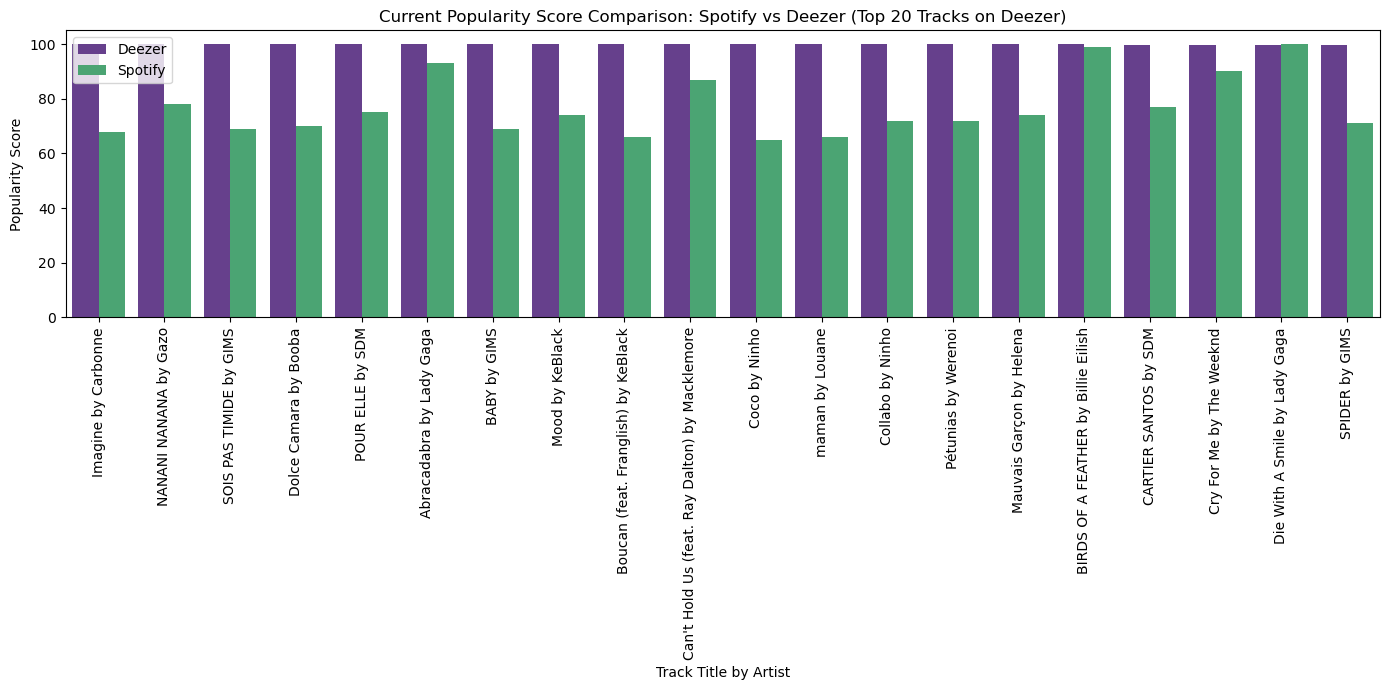

In [17]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Get the absolute file path using relative path
PROCESSED_DIR = os.path.abspath(os.path.join(os.getcwd(), "../../Data/Processed"))
file_path = os.path.join(PROCESSED_DIR, 'spotify_deezer_merged.csv')

print(f"Reading file from: {file_path}")

# Load dataset
merged_df = pd.read_csv(file_path)

# Clean titles
merged_df['safe_title'] = merged_df['deezer.title'].str.replace(r'[^\w\s]', '', regex=True)

merged_df['safe_title_artist'] = merged_df['deezer.title'] + ' by ' + merged_df['deezer.artist']

merged_df['track_type'] = merged_df['deezer.title'].str.lower().apply(
    lambda x: 'Remix/Alternate' if 'remix' in x or 'alternate' in x else 'Original'
)

# Show only top 20 tracks based on Deezer popularity rank
top_n = 20  
top_df = merged_df.sort_values(by='deezer.rank', ascending=False).head(top_n)

comparison_df = top_df[['safe_title_artist', 'deezer.rank', 'spotify.popularity']].melt(
    id_vars='safe_title_artist', 
    value_vars=['deezer.rank', 'spotify.popularity'], 
    var_name='Platform', 
    value_name='Popularity'
)

comparison_df['Platform'] = comparison_df['Platform'].map({
    'deezer.rank': 'Deezer',
    'spotify.popularity': 'Spotify'
})

#colour palette
palette = {
    'Spotify': 'mediumseagreen',
    'Deezer': 'rebeccapurple'
}

plt.figure(figsize=(14, 7))
sns.barplot(data=comparison_df, x='safe_title_artist', y='Popularity', hue='Platform', palette=palette)
plt.title("Current Popularity Score Comparison: Spotify vs Deezer (Top 20 Tracks on Deezer)")
plt.xlabel("Track Title by Artist")
plt.ylabel("Popularity Score")
plt.xticks(rotation=90)  
plt.tight_layout()  
plt.legend()
plt.show()


### Popularity Score Comparison Top 20 Tracks on Spotify

 This part is similar to the previous bit, where we are comparing the popularity scores of tracks from Deezer and Spotify. We are focusing on the top 20 tracks based on Spotify's popularity score instead.



Reading file from: c:\Users\susan\group4ds\Data\Processed\spotify_deezer_merged.csv


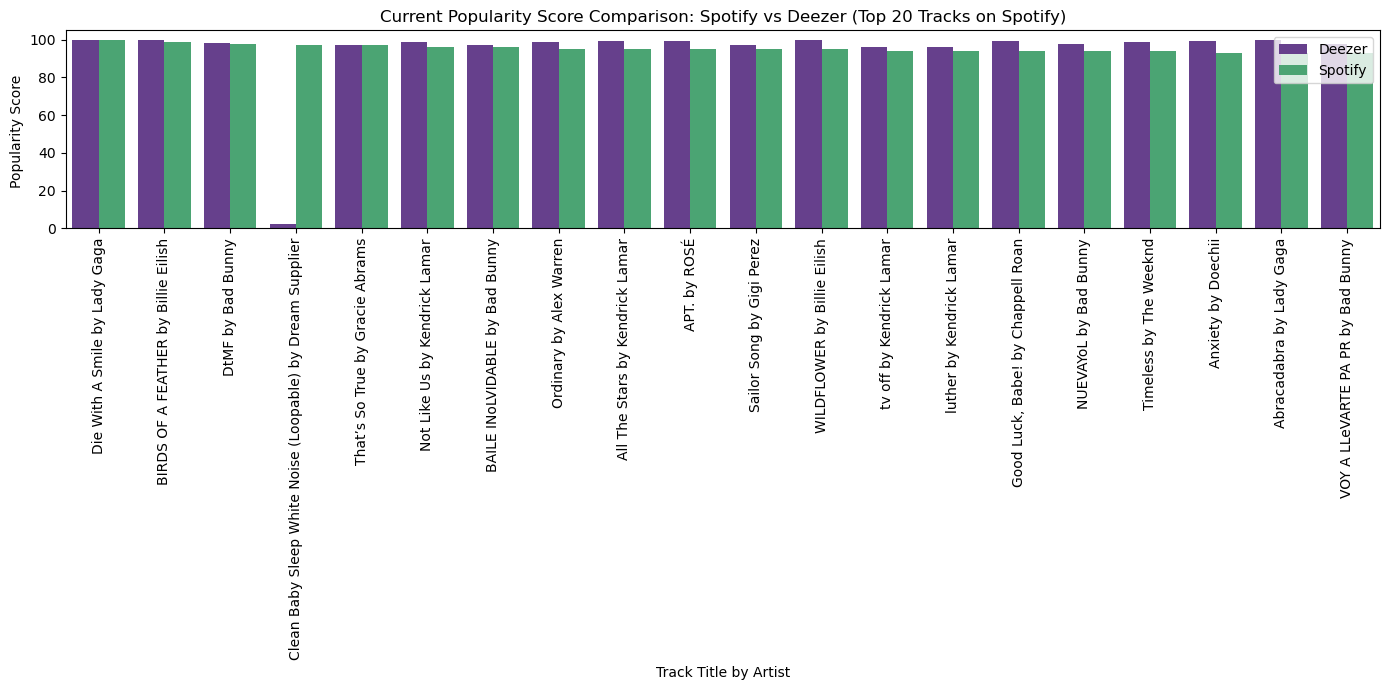

In [16]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

PROCESSED_DIR = os.path.abspath(os.path.join(os.getcwd(), "../../Data/Processed"))
file_path = os.path.join(PROCESSED_DIR, 'spotify_deezer_merged.csv')

print(f"Reading file from: {file_path}")

# Load dataset
merged_df = pd.read_csv(file_path)

# Clean titles just in case 
merged_df['safe_title'] = merged_df['deezer.title'].str.replace(r'[^\w\s]', '', regex=True)

merged_df['safe_title_artist'] = merged_df['deezer.title'] + ' by ' + merged_df['deezer.artist']

merged_df['track_type'] = merged_df['deezer.title'].str.lower().apply(
    lambda x: 'Remix/Alternate' if 'remix' in x or 'alternate' in x else 'Original'
)

top_n = 20  # Show only top 20 
top_df_spotify = merged_df.sort_values(by='spotify.popularity', ascending=False).head(top_n)

comparison_df_spotify = top_df_spotify[['safe_title_artist', 'deezer.rank', 'spotify.popularity']].melt(
    id_vars='safe_title_artist', 
    value_vars=['deezer.rank', 'spotify.popularity'], 
    var_name='Platform', 
    value_name='Popularity'
)

comparison_df_spotify['Platform'] = comparison_df_spotify['Platform'].map({
    'deezer.rank': 'Deezer',
    'spotify.popularity': 'Spotify'
})

palette = {
    'Spotify': 'mediumseagreen',
    'Deezer': 'rebeccapurple'
}

# Plot
plt.figure(figsize=(14, 7))
sns.barplot(data=comparison_df_spotify, x='safe_title_artist', y='Popularity', hue='Platform', palette=palette)
plt.title("Current Popularity Score Comparison: Spotify vs Deezer (Top 20 Tracks on Spotify)")
plt.xlabel("Track Title by Artist")
plt.ylabel("Popularity Score ")
plt.xticks(rotation=90)
plt.tight_layout()
plt.legend()
plt.show()


### How do the tracks that are more popular on Deezer compare to those on Spotify in terms of popularity difference?

### Tracks More Popular on Deezer than Spotify
This one investigates the difference in popularity between the two platforms by subtracting the Spotify popularity score from Deezer’s for each of the tracks. To find tracks that are significantly more popular on one platform than the other.


Reading file from: c:\Users\susan\group4ds\Data\Processed\spotify_deezer_merged.csv


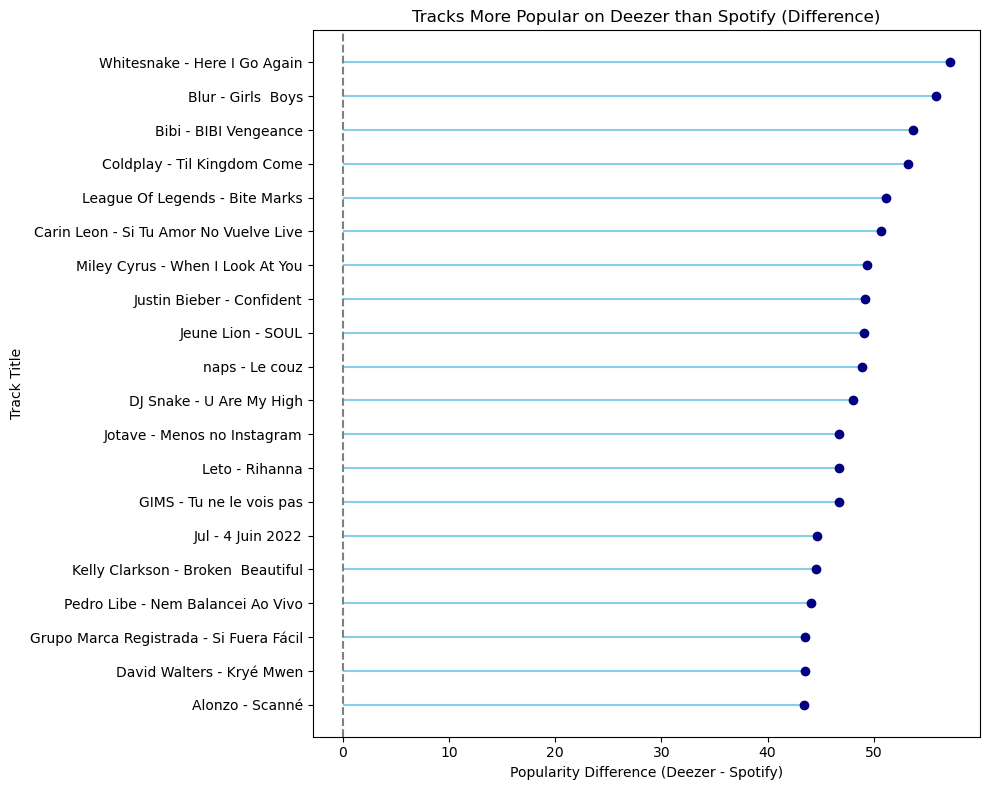

In [18]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

PROCESSED_DIR = os.path.abspath(os.path.join(os.getcwd(), "../../Data/Processed"))
file_path = os.path.join(PROCESSED_DIR, 'spotify_deezer_merged.csv')

print(f"Reading file from: {file_path}")

# Load dataset
merged_df = pd.read_csv(file_path)

merged_df['safe_title'] = merged_df['deezer.title'].str.replace(r'[^\w\s]', '', regex=True)

merged_df['track_type'] = merged_df['deezer.title'].str.lower().apply(
    lambda x: 'Remix/Alternate' if 'remix' in x or 'alternate' in x else 'Original'
)

merged_df['artist_title'] = merged_df['deezer.artist'] + " - " + merged_df['safe_title']

# Compute popularity difference 
merged_df['popularity_diff'] = merged_df['deezer.rank'] - merged_df['spotify.popularity']

# Top 20 by absolute difference
top_diff = merged_df[['artist_title', 'deezer.rank', 'spotify.popularity', 'popularity_diff']]
top_diff = top_diff.sort_values(by='popularity_diff', ascending=False).head(20)

top_diff = top_diff.sort_values(by='popularity_diff')

# Plot
plt.figure(figsize=(10, 8))
plt.hlines(y=top_diff['artist_title'], xmin=0, xmax=top_diff['popularity_diff'], color='skyblue')
plt.plot(top_diff['popularity_diff'], top_diff['artist_title'], "o", color='navy')
plt.axvline(0, color='gray', linestyle='--')
plt.title("Tracks More Popular on Deezer than Spotify (Difference)")
plt.xlabel("Popularity Difference (Deezer - Spotify)")
plt.ylabel("Track Title")
plt.tight_layout()
plt.show()


### How do the tracks that are more popular on Spotify compare to those on Deezer in terms of popularity difference?
### Tracks more popular on Spotify than Deezer

This analysis looks at the difference in popularity, with a focus on tracks that are more popular on Spotify than on Deezer. We get the top tracks with the highest positive difference (Spotify popularity minus Deezer rank), showing which tracks favour Spotify in terms of popularity.

Reading file from: c:\Users\susan\group4ds\Data\Processed\spotify_deezer_merged.csv


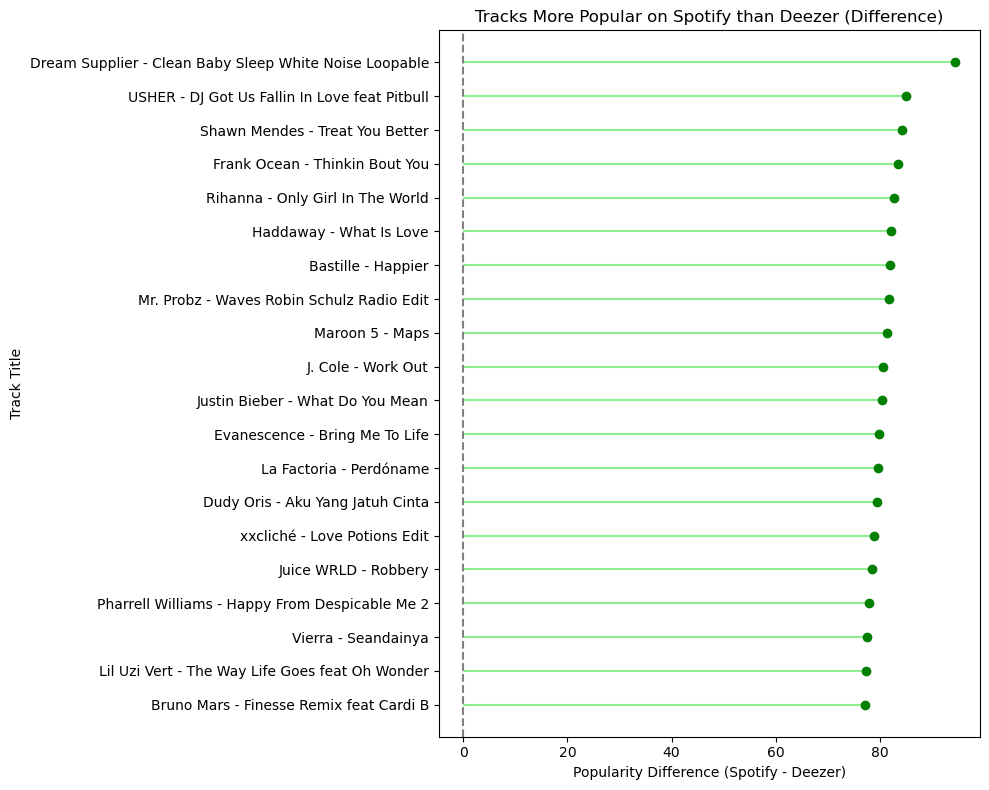

In [19]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

PROCESSED_DIR = os.path.abspath(os.path.join(os.getcwd(), "../../Data/Processed"))
file_path = os.path.join(PROCESSED_DIR, 'spotify_deezer_merged.csv')

print(f"Reading file from: {file_path}")

merged_df = pd.read_csv(file_path)

merged_df['safe_title'] = merged_df['deezer.title'].str.replace(r'[^\w\s]', '', regex=True)

merged_df['artist_title'] = merged_df['deezer.artist'] + " - " + merged_df['safe_title']

# Compute popularity difference (Spotify - Deezer )
merged_df['popularity_diff_spotify'] = merged_df['spotify.popularity'] - merged_df['deezer.rank']

# Get top 20 songs that are more popular on Spotify
top_diff_spotify = merged_df[['artist_title', 'deezer.rank', 'spotify.popularity', 'popularity_diff_spotify']]
top_diff_spotify = top_diff_spotify.sort_values(by='popularity_diff_spotify', ascending=False).head(20)

top_diff_spotify = top_diff_spotify.sort_values(by='popularity_diff_spotify')

# Plot
plt.figure(figsize=(10, 8))
plt.hlines(y=top_diff_spotify['artist_title'], xmin=0, xmax=top_diff_spotify['popularity_diff_spotify'], color='lightgreen')
plt.plot(top_diff_spotify['popularity_diff_spotify'], top_diff_spotify['artist_title'], "o", color='green')
plt.axvline(0, color='gray', linestyle='--')
plt.title("Tracks More Popular on Spotify than Deezer (Difference)")
plt.xlabel("Popularity Difference (Spotify - Deezer)")
plt.ylabel("Track Title")
plt.tight_layout()
plt.show()


 ### How do the popularity scores of tracks compare across platforms?
This section ensures that Z-scores allows for a fairer, normalized comparison across platforms. 

Reading file from: c:\Users\susan\group4ds\Data\Processed\spotify_deezer_merged.csv


C:\Users\susan\AppData\Local\Temp\ipykernel_38012\1461782522.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=z_diff_top, x='safe_title', y='z_diff', palette='vlag')


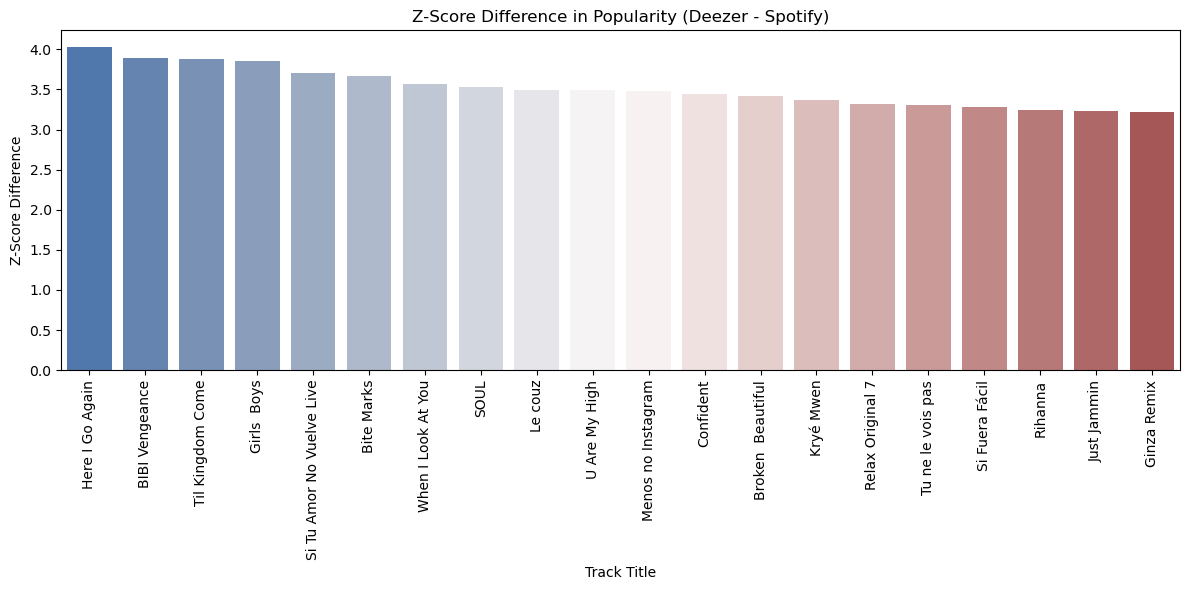

In [20]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

PROCESSED_DIR = os.path.abspath(os.path.join(os.getcwd(), "../../Data/Processed"))
file_path = os.path.join(PROCESSED_DIR, 'spotify_deezer_merged.csv')

print(f"Reading file from: {file_path}")

merged_df = pd.read_csv(file_path)

merged_df['safe_title'] = merged_df['deezer.title'].str.replace(r'[^\w\s]', '', regex=True)

# Add z-scores
merged_df['deezer_z'] = zscore(merged_df['deezer.rank'])
merged_df['spotify_z'] = zscore(merged_df['spotify.popularity'])

merged_df['z_diff'] = merged_df['deezer_z'] - merged_df['spotify_z']
z_diff_top = merged_df[['safe_title', 'deezer_z', 'spotify_z', 'z_diff']].sort_values(by='z_diff', ascending=False).head(20)

# Plot z-score differences
plt.figure(figsize=(12, 6))
sns.barplot(data=z_diff_top, x='safe_title', y='z_diff', palette='vlag')
plt.title("Z-Score Difference in Popularity (Deezer - Spotify)")
plt.xticks(rotation=90)
plt.xlabel("Track Title")
plt.ylabel("Z-Score Difference")
plt.tight_layout()
plt.show()


Reading file from: c:\Users\susan\group4ds\Data\Processed\spotify_deezer_merged.csv


C:\Users\susan\AppData\Local\Temp\ipykernel_38012\1949513230.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=z_diff_top, x='safe_title', y='z_diff', palette='vlag')


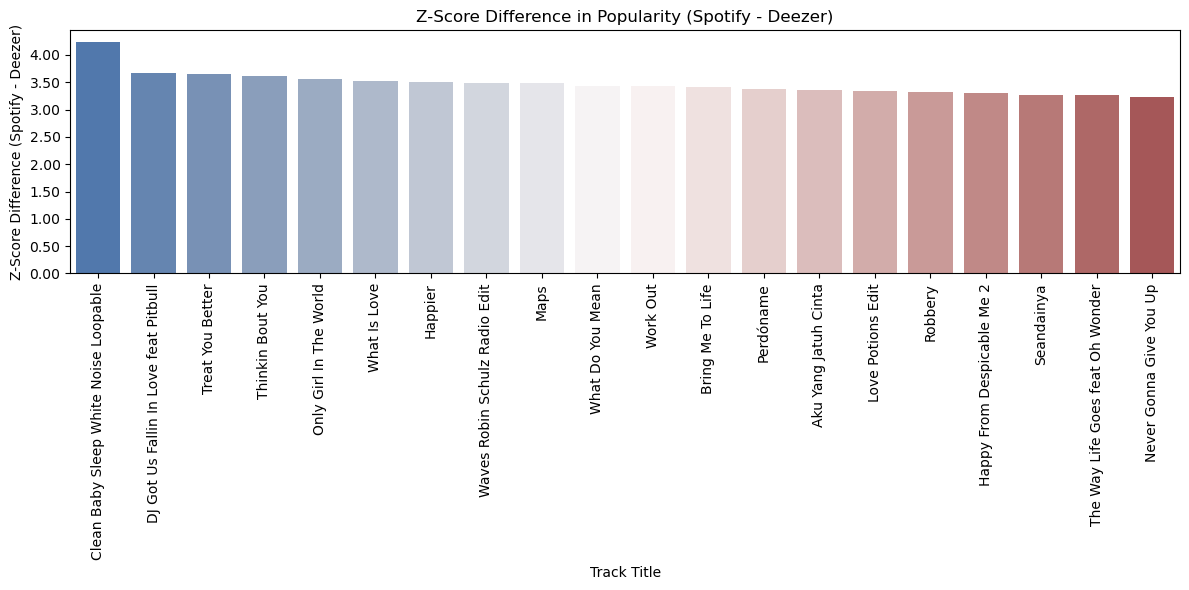

In [21]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from matplotlib.ticker import FuncFormatter, MultipleLocator

PROCESSED_DIR = os.path.abspath(os.path.join(os.getcwd(), "../../Data/Processed"))
file_path = os.path.join(PROCESSED_DIR, 'spotify_deezer_merged.csv')

print(f"Reading file from: {file_path}")

merged_df = pd.read_csv(file_path)

merged_df['safe_title'] = merged_df['deezer.title'].str.replace(r'[^\w\s]', '', regex=True)

# Remove tracks with missing data for 'deezer.rank' or 'spotify.popularity'
merged_df = merged_df.dropna(subset=['deezer.rank', 'spotify.popularity'])

merged_df['track_type'] = merged_df['deezer.title'].str.lower().apply(
    lambda x: 'Remix/Alternate' if 'remix' in x or 'alternate' in x else 'Original'
)

# Add z-scores for Deezer and Spotify
merged_df['deezer_z'] = zscore(merged_df['deezer.rank'])
merged_df['spotify_z'] = zscore(merged_df['spotify.popularity'])

# Compute z-score difference (Spotify - Deezer)
merged_df['z_diff'] = merged_df['spotify_z'] - merged_df['deezer_z']

z_diff_top = merged_df[['safe_title', 'deezer_z', 'spotify_z', 'z_diff']].sort_values(by='z_diff', ascending=False).head(20)

# Plot z-score differences
plt.figure(figsize=(12, 6))
sns.barplot(data=z_diff_top, x='safe_title', y='z_diff', palette='vlag')

# float values
formatter = FuncFormatter(lambda x, _: f'{x:.2f}')
plt.gca().yaxis.set_major_formatter(formatter)

# 0.5 intervals
plt.gca().yaxis.set_major_locator(MultipleLocator(0.5))

plt.title("Z-Score Difference in Popularity (Spotify - Deezer)")
plt.xticks(rotation=90)
plt.xlabel("Track Title")
plt.ylabel("Z-Score Difference (Spotify - Deezer)")
plt.tight_layout()
plt.show()


## General Conclusion:
 Seeing the top tracks from both platforms, including those that are more popular on Deezer and on Spotify, we observed significant differences in how songs are received by people.

Popularity Comparison: Sometimes, tracks are more popular on Deezer, implying that Deezer may have a more specific audience that engages with particular tracks more strongly. On the other hand, certain tracks performed significantly better on Spotify, showcasing its bigger user engagement, algorithmic preferences, and possibly greater promotion through playlists.

Platform-Specific Preferences: These have also shown the differences in how the two platforms   recommend music, with Deezer and Spotify showing preferences for different types of tracks, artists, and genres. These differences definitely are connected with the platforms' unique algorithms, user behaviors, and regional influences.

Z-Score Normalization: The use of Z-scores to standardize popularity differences has allowed for a more balanced comparison, emphasizing the relative performance of tracks across both platforms. This helped highlight which tracks perform well in one platform compared to the other.


